In [6]:
import os
import sys
import json        

sys.path.insert(0, '../src/features')                                                                                                                                              
sys.path.insert(0, '../src/visualization')    

import generate_features
import plot_graphs

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
with open('../config/viz_params.json') as f:
    viz_params = json.load(f)
        
# Cfg variables
path = viz_params['path']
top_k = viz_params["top_k"]
top_k_fig_path = f'../{viz_params["top_k_fig_path"]}'
user_hist_path = f'../{viz_params["user_hist_path"]}'
user_hist_zoom_path = f'../{viz_params["user_hist_zoom_path"]}'
good_path = f'../{viz_params["good_path"]}'
bad_path = f'../{viz_params["bad_path"]}'
good_tags = viz_params['good_tags']
bad_tags = viz_params['bad_tags']
maximum_posts = viz_params['maximum_posts']

In [4]:
jsons = [os.path.join(f'../{path}', name) for name in sorted(os.listdir(f'../{path}')) if 'dataset' in name]

# Misinformation on Twitter

As a well-established social media platform, Twitter is a constantly buzzing hub for social discourse. Its accessibility, however, may unknowingly contribute to the spread of misinformation. We will be exploring some popularity statistics in COVID-19 related Twitter data.

In [27]:
# Group information about hashtags and users
hashtag_features = generate_features.count_features(jsons)
user_features = generate_features.count_features(jsons, mode = 'user')
scientific_data, misinformation_data = generate_features.count_over_time(jsons, good_tags, bad_tags)

### Most Used Hashtags

We want to observe the most popular hashtags to gain a sense of what kinds of hashtags we can use to distinguish misinformative tweets from factually supported tweets.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

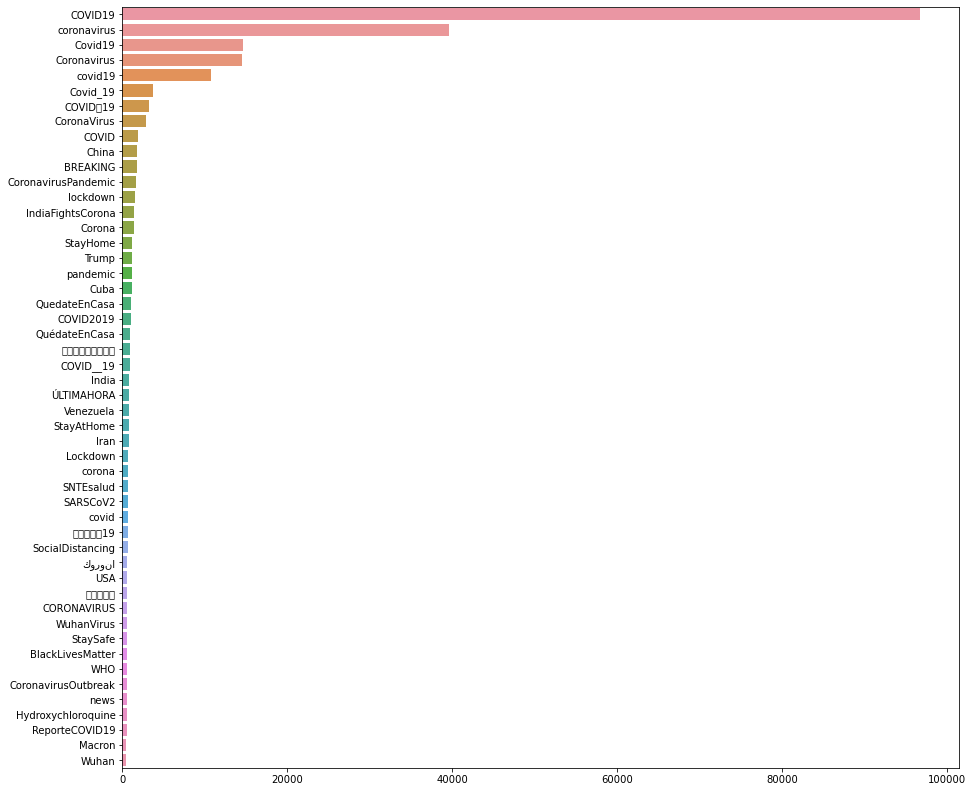

In [21]:
plot_graphs.top_k_bar(hashtag_features, top_k, top_k_fig_path)

Most of these hashtags, as expected, are just about the virus itself, and less about any implications of the virus. These, unfortunately, do not seem to distinguish factually-based news from misinformation. We can look into a different range, instead, to find hashtags we would want to use.

In [28]:
hashtag_features.iloc[100:150]

Health                 269.0
Pandemic               267.0
Trump2020              265.0
HongKong               263.0
Blood                  261.0
CoronaUpdate           255.0
YoMeQuedoEnCasa        254.0
masques                252.0
quarantine             250.0
AI                     250.0
緊急事態宣言                 247.0
Italy                  246.0
Italia                 245.0
BreakingNews           244.0
Texas                  239.0
Quarantine             238.0
mentalhealth           237.0
COVID19India           232.0
Chile                  231.0
chloroquine            231.0
BorisJohnson           229.0
TogetherAtHome         228.0
cdnpoli                228.0
socialdistancing       227.0
Colombia               227.0
Brazil                 224.0
coronavírus            222.0
Israel                 222.0
Conte                  219.0
NuevaNormalidad        216.0
ULTIMAHORA             215.0
WWG1WGA                215.0
Odisha                 214.0
healthcare             213.0
WATCH         

This range will certainly give us better potential hashtags to work with.

### User Post Frequency

Next, we want to find out how many active users exist in our dataset. This will give us a sense of the kinds of "sparse" trees we will be creating to observe spread.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

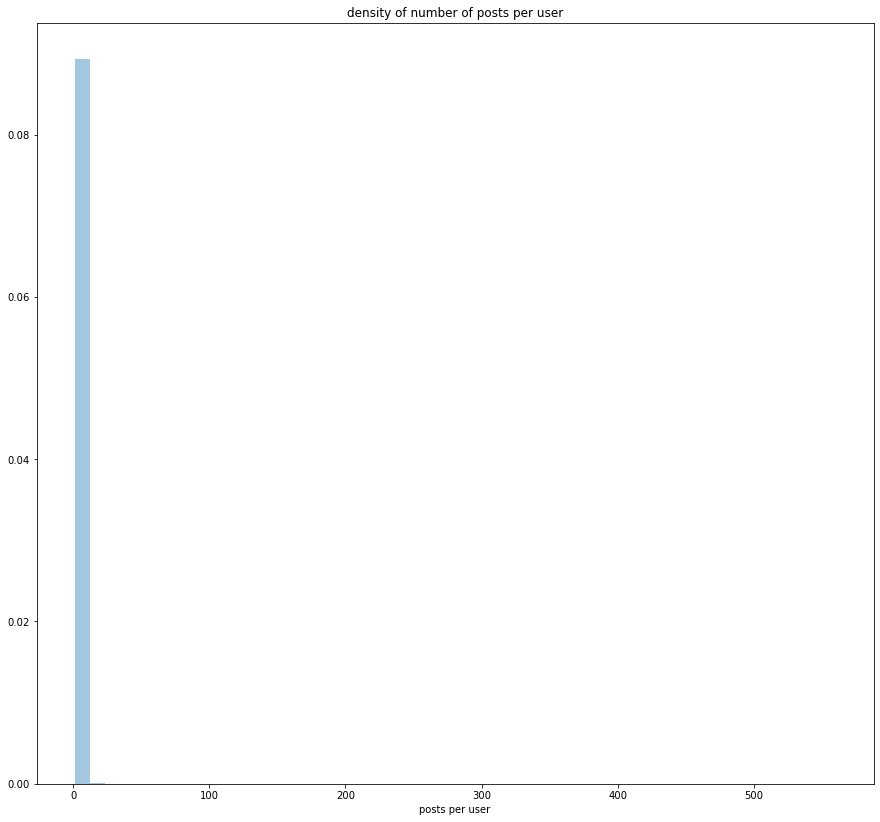

In [30]:
plot_graphs.user_hist(user_features, user_hist_path)

Any distribution is difficult to see. Let's try zooming in on the majority to see if we can glean any information about the majority of active users.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

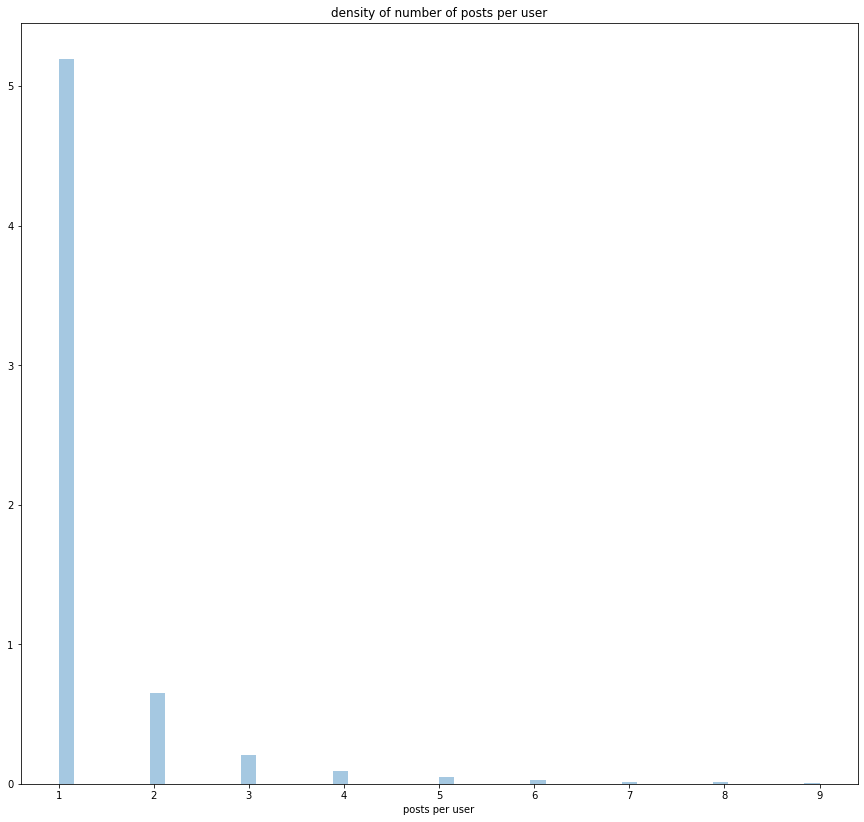

In [34]:
plot_graphs.user_hist(user_features, user_hist_zoom_path, maximum_posts)

Most users seem to have posted under 10 times in the dates that we spanned.

### Hashtag usage over time

Now that we have a sense of which hashtags to be tracking, we can start observing the popularity of certain hashtags over time. We have selected a few of these hashtags (which are editable in `root/config/viz_params`) to observe.

Our "scientific" hashtag usage is as follows:

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

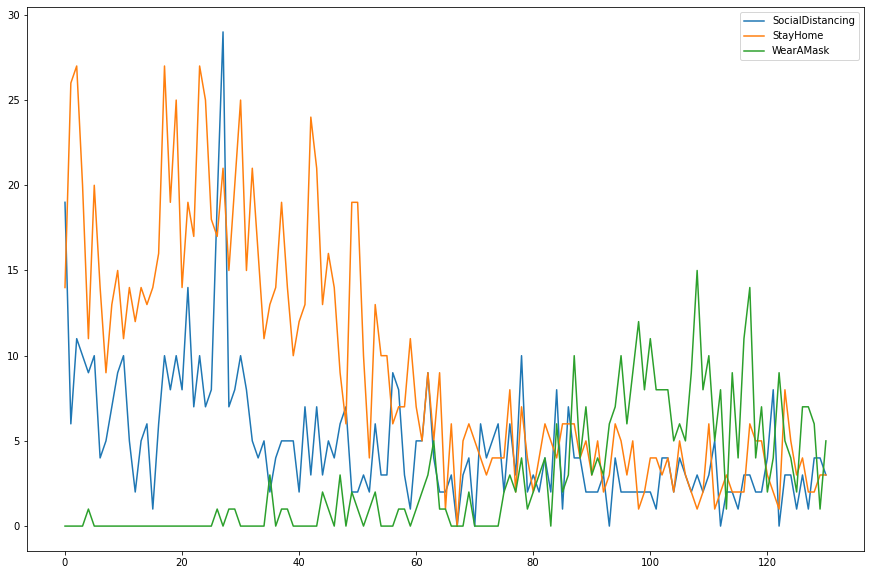

In [24]:
plot_graphs.plot_tags(good_tags, scientific_data, good_path)

Our "misinformation" hashtags are as follows:

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

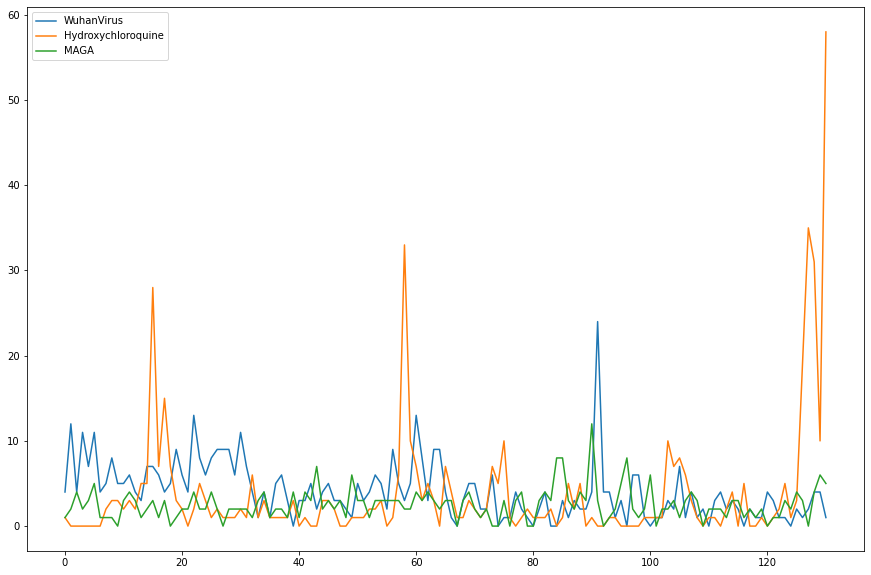

In [25]:
plot_graphs.plot_tags(bad_tags, misinformation_data, bad_path)

It seems that, in the scientific case, most of these hashtags behave as trends; while popular at a certain time, their usage dies out over time. Meanwhile, the misinforamtion hashtags seem fairly consistent throughout time time, if not slightly growing in usage.